# 독립동일분포
- 확률변수가 서로 독립이라는 것은 확률변수가 다른 확률변수에 영향을 끼치지 않는다는 의미이다.
- 통계분석에서 취급하는 데이터 중 상당수가 독립이면서 다차원인 확률변수의 실현값으로 간주될 수 있다.
- 서로 독립이고 각각 동일한 확률분포를 따르는 다차원 확률변수를 독립동일분포라 한다.
- 동일한 조건 아래에서 수행되는 실험이나 관측을 여러번 반복하여 데이터를 얻는 것을 수학용어로 나타낸 것

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, integrate
from scipy.optimize import minimize_scalar
np.random.seed(0)
import warnings
warnings.filterwarnings('ignore', category=integrate.IntegrationWarning)
%precision 3
%matplotlib inline

In [51]:
linestyles = ['-', '--', ':', '-. ']

def E(XY, g):
    x_set, y_set, f_XY = XY
    return np.sum([g(x_i, y_j) * f_XY(x_i, y_j)for x_i in x_set for y_j in y_set])

def Cov(XY):
    x_set, y_set, f_XY = XY
    mean_X = E(XY, lambda x, y:x)
    mean_Y = E(XY, lambda x, y:y)
    return np.sum([(x_i-mean_X) * (y_j-mean_Y) * f_XY(x_i, y_j)for x_i in x_set for y_j in y_set])

def f_X(x):
    return np.sum([f_XY(x, y_k) for y_k in y_set])

def f_Y(y):
    return np.sum([f_XY(x_k, y) for x_k in x_set])

## 독립성

### 독립성의 정의
- 2개 이상의 확률변수가 서로 영향을 끼치지 않으며 관계가 없음을 나타내는 개념
- 2차원 확률변수 (X,Y)의 경우 다음과 같은 관계가 성립할 때 X,Y는 독립이라고 함.  
$f_{X,Y}(x,y) = f_X(x)f_Y(y)$
- 확률변수가 독립일 때 결합확률은 주변확률의 곱으로 작성할 수 있다.
- 일반화 : $f_{X_1,X_2,...,X_n}(x_1,x_2,..x_n) = f_{X_1}(x_1)f_{X_2}(x_2)···f_{X_n}(x_n)$  
※ 함수 f가 이산형이면 확률함수, 연속형이면 밀도함수를 나타냄

### 독립성과 무상관성
- 공분산이나 상관계수가 0일 때 무상관이라 하고 두 확률변수 사이에는 상관성, 즉 선형 관계가 없음을 나타냄
- 독립성도 무상관성도 두 확률변수가 서로 관계가 없다는 것을 나타내는 성질이다.
    - 무상관성보다 독립성이 더 강한 개념
    - 2개의 확률변수 X와 Y가 독립일 때 X와 Y는 무상관이 되지만 X와 Y가 무상관일 때 X와 Y가 반드시 독립인 것은 아님

In [52]:
# 불공정한 주사위의 예
x_set = np.array([1,2,3,4,5,6])
y_set = np.array([1,2,3,4,5,6])

def f_XY(x,y):
    if x in x_set and y in y_set:
        return x* y / 441
    else:
        return 0
    
XY = [x_set,y_set, f_XY]

In [53]:
# 2차원 확률변수 X와 Y는 독립
# 공분산이 0이므로 무상관
Cov(XY)

-0.000

In [54]:
# 무상관인 2개의 확률변수 고려
x_set = np.array([0,1])
y_set = np.array([-1,0,1])

def f_XY(x,y):
    if (x,y) in [(0,0),(1,1),(1,-1)]:
        return 1/3
    else:
        return 0
    
XY = [x_set, y_set, f_XY]

In [55]:
Cov(XY)

0.000

In [56]:
f_X(0) * f_Y(0), f_XY(0,0)

(0.111, 0.333)

## 합의 분포
- 서로 독립이고 동일한 확률분포을 따르는 확률변수 $X_1,X_2,···,X_n의 합 \sum_{i=1}^n X_i = X_1 + X_2 + ···+ X_n$이 따르는 확률분포를 의미
- 합의 분포를 이해하면 확률변수의 합을 n으로 나눈 표본평균의 분포도 쉽게 이해할 수 있음
- 확률변수 합의 기댓값 : $E(X_1 + X_2 + ··· + X_n) = E(X_1) + E(X_2) + ··· E(X_n)$ 이 성립
- 확률변수 합의 공식 : $X_1, X_2, ··· ,X_n이 서로 독립이면  V(X_1 + X_2 + ··· + X_n) = V(X_1) + V(X_2) + ··· V(X_n)$이 성립  
결국 합의 분포 분산도 각 확률변수에 대한 분산의 합으로 계산할 수 있다.

### 정규분포

In [57]:
# 정규분포 합의 분포
# 서로 독립인 X~N(1,2), Y~N(2,3)이 있을 때 확률변수 X + Y 의 분포는 N(3,5)를 따름
rv1 = stats.norm(1,np.sqrt(2))
rv2 = stats.norm(2,np.sqrt(3))

sample_size = int(1e6)
X_sample = rv1.rvs(sample_size)
Y_sample = rv2.rvs(sample_size)
print(X_sample, '\n')
print(Y_sample, '\n')
sum_sample  = X_sample + Y_sample
print('평균:', np.mean(X_sample),np.mean(Y_sample),'\n')
print('분산:', np.var(X_sample), np.var(Y_sample),'\n')
print('합의 평균, 분산:', np.mean(sum_sample), np.var(sum_sample))

[ 3.495  1.566  2.384 ... -0.128  2.237  2.94 ] 

[ 2.891  3.928  3.169 ... -1.152  1.427  1.326] 

평균: 1.0021384981105663 2.0005273223788174 

분산: 1.999685316445821 2.993320616863069 

합의 평균, 분산: 3.0026658204893835 4.9960524321119335


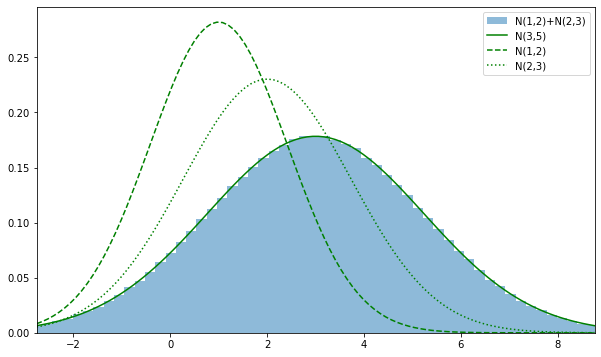

In [58]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv = stats.norm(3, np.sqrt(5))
xs = np.linspace(rv.isf(0.995), rv.isf(0.005), 100)

ax.hist(sum_sample, bins=100, density=True, alpha=0.5, label='N(1,2)+N(2,3)')
ax.plot(xs, rv.pdf(xs), label='N(3,5)',color='green')
ax.plot(xs, rv1.pdf(xs), label='N(1,2)', ls='--', color='green')
ax.plot(xs, rv2.pdf(xs), label='N(2,3)', ls=':', color='green')

ax.legend()
ax.set_xlim(rv.isf(0.995), rv.isf(0.005))
plt.show()

히스토그램과 밀도함수가 일치

### 포아송 분포

In [59]:
# 포아송 분포의 합
rv1 = stats.poisson(3)
rv2 = stats.poisson(4)

sample_size = int(1e6)
X_sample = rv1.rvs(sample_size)
Y_sample = rv2.rvs(sample_size)
sum_sample = X_sample + Y_sample

np.mean(sum_sample), np.var(sum_sample) # 평균과 분산

(6.999, 6.990)

/var/folders/v1/zh7hrj6j0h1gyhss4417qmqm0000gn/T/ipykernel_10143/2172927633.py:6: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  hist,_ = np.histogram(sum_sample, bins=20, range=(0,20), normed=True)


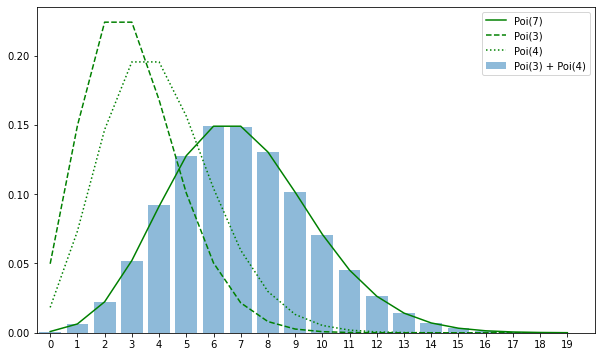

In [60]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv = stats.poisson(7)
xs = np.arange(20)
hist,_ = np.histogram(sum_sample, bins=20, range=(0,20), normed=True)

ax.bar(xs, hist, alpha=0.5, label='Poi(3) + Poi(4)')
ax.plot(xs, rv.pmf(xs), label='Poi(7)', color='green')
ax.plot(xs, rv1.pmf(xs), label='Poi(3)', ls='--', color='green')
ax.plot(xs, rv2.pmf(xs), label='Poi(4)',  ls=':', color='green')

ax.legend()
ax.set_xlim(-0.5,20)
ax.set_xticks(np.arange(20))
plt.show()

히스토그램과 밀도함수가 일치

### 베르누이 분포

In [61]:
# 베르누이 분포의 합
p = 0.3
rv = stats.bernoulli(p)

sample_size = int(1e6)
Xs_sample = rv.rvs((10, sample_size))
sum_sample = np.sum(Xs_sample, axis=0)

np.mean(sum_sample), np.var(sum_sample)

(2.999, 2.095)

/var/folders/v1/zh7hrj6j0h1gyhss4417qmqm0000gn/T/ipykernel_10143/251856284.py:6: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  hist, _ = np.histogram(sum_sample, bins=10, range=(0,10), normed=True)


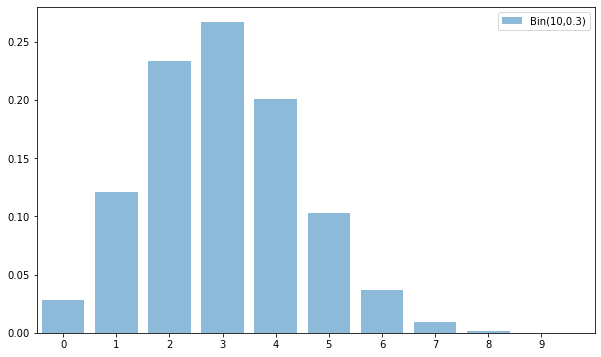

In [17]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv = stats.binom(10,p)
xs = np.arange(10)
hist, _ = np.histogram(sum_sample, bins=10, range=(0,10), normed=True)

ax.bar(xs,hist, alpha=0.5, label='Bin(10,0.3)')
ax.legend()
ax.set_xlim(-0.5, 10)
ax.set_xticks(np.arange(10))
plt.show()

## 표본평균의 분포
- 표본평균의 분포란 서로 독립이고 동일한 확률분포를 따르는 확률변수 $X_1, X_2, ...,X_n$의 표본평균이 따르는 분포
- 이 분포는 중심극한정리나 대수의 법칙 등 추측통계에서 중요한 성질을 담고 있기 때문에 유의해야 함
- 표본평균의 기댓값과 분산  
$E(\bar{X}) = \mu$  
$V(\bar{X}) = {\sigma}^2 / n$

In [18]:
mean = 1
var = 2
rv = stats.norm(mean, np.sqrt(var))

n = 10
sample_size = int(1e6)
Xs_sample = rv.rvs((n, sample_size))
sample_mean = np.mean(Xs_sample, axis=0)

np.mean(sample_mean), np.var(sample_mean)

(1.000, 0.200)

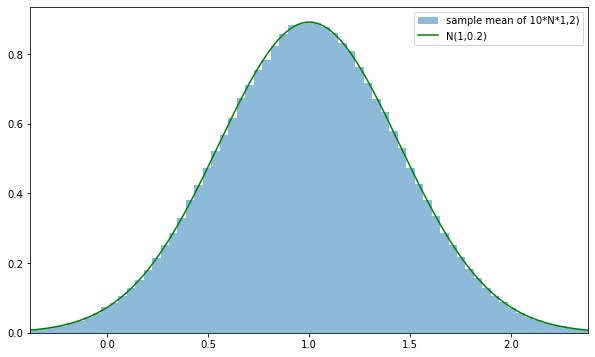

In [23]:
# 정규분포의 표본평균
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv_true = stats.norm(mean, np.sqrt(var/n))
xs = np.linspace(rv_true.isf(0.999), rv_true.isf(0.001),100)
ax.hist(sample_mean, bins=100, density=True, alpha=0.5, label='sample mean of 10*N*1,2)')
ax.plot(xs, rv_true.pdf(xs), label='N(1,0.2)',color='green')

ax.legend()
ax.set_xlim(rv_true.isf(0.999), rv_true.isf(0.001))
plt.show()

In [28]:
l = 3
rv = stats.poisson(l)

n=10
sample_size = int(1e6)
Xs_sample = rv.rvs((n, sample_size))
sample_mean = np.mean(Xs_sample, axis=0)

np.mean(sample_mean), np.var(sample_mean)

(3.000, 0.300)

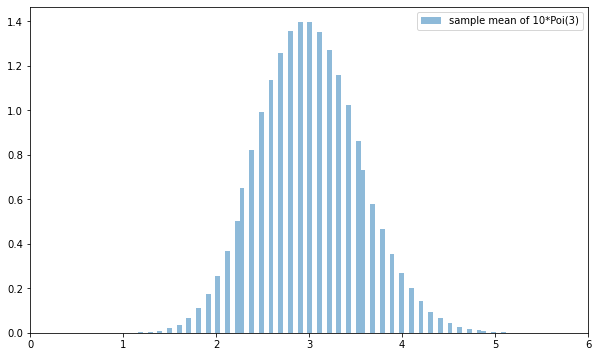

In [30]:
# 포아송 분포의 표본평균
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ax.hist(sample_mean, bins=100, density=True, alpha=0.5, label='sample mean of 10*Poi(3)')
ax.legend()
ax.set_xlim(0,6)
plt.show()

### 중심극한정리
- 확률변수 $X_1,X_2,...Xn$이 서로 독립이고 기댓값이 $\mu, 분산이 {\sigma}^2$인 확률분포 F를 따를 때 n이 커짐에 따라 표본평균 $\bar{X}의 분포는 정규분포 N(\mu,{\sigma}^2/n)$에 가까워진다.

In [35]:
l = 3
rv = stats.poisson(l)

n = 10000
sample_size = 10000
Xs_sample = rv.rvs((n, sample_size))
sample_mean = np.mean(Xs_sample, axis=0)

rv_true = stats.norm(l, np.sqrt(l/n))
xs = np.linspace(rv_true.isf(0.999), rv_true.isf(0.001),100)

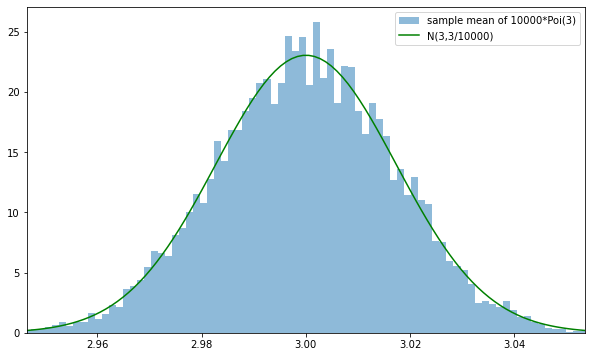

In [36]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ax.hist(sample_mean, bins=100, density=True, alpha=0.5, label='sample mean of 10000*Poi(3)')
ax.plot(xs, rv_true.pdf(xs), label='N(3,3/10000)', color='green')
ax.legend()
ax.set_xlim(rv_true.isf(0.999), rv_true.isf(0.001))
plt.show()

### 대수의 법칙
확률변수 $X_1,X_2,...,X_n$이 서로 독립이고 평균이 $\mu, 분산이 \sigma^2$일 것 같은 확률분포를 따를 때 n이 커짐에 따라 표본평균은 $\mu$에 수렴한다.

In [62]:
p = 1/6
rv = stats.bernoulli(p)

n = int(1e5)
sample = rv.rvs((n,4))
space = np.linspace(100,n,50).astype(int)
plot_list = np.array([np.mean(sample[:sp], axis=0)for sp in space]).T

ValueError: '-. ' is not a valid value for ls; supported values are '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'

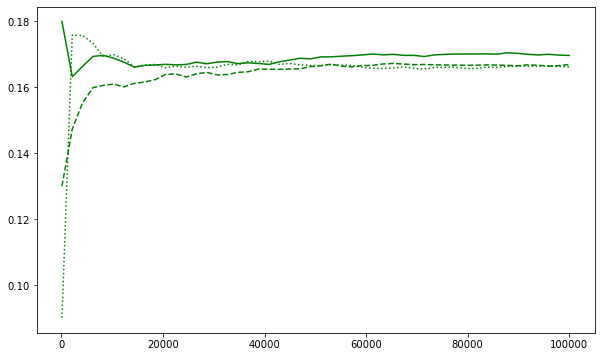

In [67]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

for pl, ls in zip(plot_list, linestyles):
    ax.plot(space, pl, ls=ls, color='green')
ax.hlines(p,-1,n,'k')
ax.set_xlabel('sample size')
ax.set_ylabel('sample mean')

plt.show()

#### [과제]
중심극한정리와 대수의 법칙을 사례를 들어 설명하세요.